# Week 10 Final Assignment: Unravaeling LA's Commute:
## Unravaeling LA's Commute: A Journey Beyond Income
### Data manipulation for Side-by-Side and Single Side plots: Neighborhood's, Educational Attainment and Population Size
##### José Portales

#### Integrating Geographic Data and Educational Data

In [570]:
import pandas as pd
import geopandas as gpd
neighborhoods=gpd.read_file('LA_Times_Neighborhood_Boundaries.geojson')

In [571]:
# Load the GeoJSON file
neighborhoods = gpd.read_file('LA_Times_Neighborhood_Boundaries.geojson')

# Display the first few rows
print("First few rows of the dataset:")
print(neighborhoods.head())

# Display information about the DataFrame
print("\nDataFrame Information:")
neighborhoods.info()

First few rows of the dataset:
   OBJECTID                    name  \
0         1         Adams-Normandie   
1         2                  Arleta   
2         3       Arlington Heights   
3         4         Atwater Village   
4         5  Baldwin Hills/Crenshaw   

                                            geometry  
0  POLYGON ((-118.30069 34.03731, -118.30388 34.0...  
1  POLYGON ((-118.44255 34.26412, -118.44240 34.2...  
2  POLYGON ((-118.31862 34.05306, -118.31673 34.0...  
3  MULTIPOLYGON (((-118.27886 34.15321, -118.2788...  
4  POLYGON ((-118.36102 34.02532, -118.36026 34.0...  

DataFrame Information:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   OBJECTID  114 non-null    int64   
 1   name      114 non-null    object  
 2   geometry  114 non-null    geometry
dtypes: geometry(1), int64(1), object(1)
memory usage: 2.8+ KB


In [572]:
import pandas as pd

# Upload EALAC.csv file with Bacherlor's percentage information
EA = 'EALAC.csv'

# Load the CSV file, specifying the delimiter 
data = pd.read_csv(EA, delimiter=';')

# Display the first few rows of the DataFrame to verify it's loaded correctly
print(data.head())

# Display information about the DataFrame to understand its structure
data.info()


         name  year denom_pop_25_over Bachelor's Degree or Higher
0   Irwindale  2022           1095,15                       19,91
1  Pico-Union  2022          25829,46                       15,47
2    Glendora  2022           35746,7                        3,73
3    Industry  2022           9114,76                       24,16
4      Sylmar  2022          53069,47                       19,97
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         258 non-null    object
 1   year                         258 non-null    int64 
 2   denom_pop_25_over            257 non-null    object
 3   Bachelor's Degree or Higher  257 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.2+ KB


In [573]:
import pandas as pd
import geopandas as gpd

#'neighborhoods' and 'data' are already loaded

# Merge the datasets on the 'name' column
merged_gdf = neighborhoods.merge(data, on='name')

# Rename the 'name' column to 'Neighborhoods'
merged_gdf.rename(columns={'name': 'Neighborhoods'}, inplace=True)

# Display the first few rows of the merged dataset to confirm the merge and rename
print(merged_gdf.head())

# Display information about the merged dataset
merged_gdf.info()


   OBJECTID           Neighborhoods  \
0         1         Adams-Normandie   
1         2                  Arleta   
2         3       Arlington Heights   
3         4         Atwater Village   
4         5  Baldwin Hills/Crenshaw   

                                            geometry  year denom_pop_25_over  \
0  POLYGON ((-118.30069 34.03731, -118.30388 34.0...  2022          11309,83   
1  POLYGON ((-118.44255 34.26412, -118.44240 34.2...  2022          22867,15   
2  POLYGON ((-118.31862 34.05306, -118.31673 34.0...  2022          14251,74   
3  MULTIPOLYGON (((-118.27886 34.15321, -118.2788...  2022           9505,62   
4  POLYGON ((-118.36102 34.02532, -118.36026 34.0...  2022          24141,58   

  Bachelor's Degree or Higher  
0                       18,96  
1                       13,93  
2                       27,06  
3                       49,87  
4                       34,89  
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns

<Axes: >

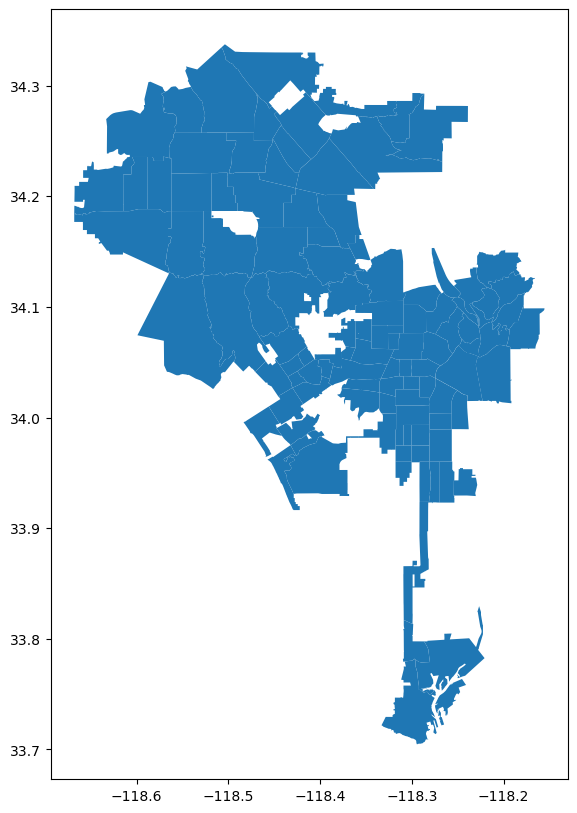

In [574]:
import matplotlib.pyplot as plt

# Check the merge visually
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged_gdf.plot(ax=ax)




In [575]:
merged_gdf.head()


OBJECTID           Neighborhoods  \
0         1         Adams-Normandie   
1         2                  Arleta   
2         3       Arlington Heights   
3         4         Atwater Village   
4         5  Baldwin Hills/Crenshaw   

                                            geometry  year denom_pop_25_over  \
0  POLYGON ((-118.30069 34.03731, -118.30388 34.0...  2022          11309,83   
1  POLYGON ((-118.44255 34.26412, -118.44240 34.2...  2022          22867,15   
2  POLYGON ((-118.31862 34.05306, -118.31673 34.0...  2022          14251,74   
3  MULTIPOLYGON (((-118.27886 34.15321, -118.2788...  2022           9505,62   
4  POLYGON ((-118.36102 34.02532, -118.36026 34.0...  2022          24141,58   

  Bachelor's Degree or Higher  
0                       18,96  
1                       13,93  
2                       27,06  
3                       49,87  
4                       34,89

#### Data manipulation and analysis-Educational Attainments across Neighborhoods

In [576]:
# convert all values to strings. Data is uniform for further operations
merged_gdf["Bachelor's Degree or Higher"] = merged_gdf["Bachelor's Degree or Higher"].astype(str)

# Replace commas with dots and remove  characters that are not digits or dots, removing non-numeric characters
merged_gdf["Bachelor's Degree or Higher"] = merged_gdf["Bachelor's Degree or Higher"].str.replace(',', '.').str.extract('(\d+\.\d+|\d+)')[0]

# Convert the cleaned strings to floats for analysis
merged_gdf["Bachelor's Degree or Higher"] = merged_gdf["Bachelor's Degree or Higher"].astype(float)

# Sort and filter to organize columns
sorted_gdf = merged_gdf.sort_values(by="Bachelor's Degree or Higher", ascending=False)

# Top 10 highest by Bachelor's Degree or Higher
top_10_highest = sorted_gdf.head(10)

# Predefined list for the lowest 10 neighborhoods filtered previously
lowest_neighborhoods = [
    "Wilmington", "Vermont Knolls", "Harvard Park", "Green Meadows",
    "Broadway-Manchester", "South Park", "Historic South-Central",
    "Florence", "Central-Alameda", "Watts"
]

# Filter and sort the lowest 10
lowest_10 = merged_gdf[merged_gdf['Neighborhoods'].isin(lowest_neighborhoods)].sort_values(by="Bachelor's Degree or Higher", ascending=False)

# Display the results and corroborate matches between top/bottom neighborhoods
print("Top 10 Neighborhoods by Bachelor's Degree or Higher:")
print(top_10_highest[['Neighborhoods', "Bachelor's Degree or Higher"]].to_string(index=False))

print("\nSpecified Lowest 10 Neighborhoods by Bachelor's Degree or Higher (Ordered):")
print(lowest_10[['Neighborhoods', "Bachelor's Degree or Higher"]].to_string(index=False))


Top 10 Neighborhoods by Bachelor's Degree or Higher:
       Neighborhoods  Bachelor's Degree or Higher
           Brentwood                        80.62
         Playa Vista                        78.73
   Pacific Palisades                        77.92
    West Los Angeles                        77.26
       Cheviot Hills                        75.41
            Westwood                        74.83
             Bel-Air                        72.91
       Playa del Rey                        71.78
        Century City                        71.18
Hollywood Hills West                        70.57

Specified Lowest 10 Neighborhoods by Bachelor's Degree or Higher (Ordered):
         Neighborhoods  Bachelor's Degree or Higher
            Wilmington                         9.86
        Vermont Knolls                         9.82
          Harvard Park                         9.67
         Green Meadows                         8.45
   Broadway-Manchester                         8.34
        

In [577]:
import pandas as pd

# Load the population data
population_data = pd.read_csv('TOTALPOP.csv', delimiter=';')

In [578]:
population_data.head()


name  year total_pop
0   Irwindale  2022   1574,77
1  Pico-Union  2022  37698,79
2    Glendora  2022  52772,22
3    Industry  2022  12869,91
4      Sylmar  2022  79799,12

In [579]:


# Rename the "name" column to "Neighborhoods" to match GeoDataFrame
population_data.rename(columns={'name': 'Neighborhoods'}, inplace=True)

#merge the population data 
merged_gdf = merged_gdf.merge(population_data, on='Neighborhoods', how='left')

merged_gdf.head()


OBJECTID           Neighborhoods  \
0         1         Adams-Normandie   
1         2                  Arleta   
2         3       Arlington Heights   
3         4         Atwater Village   
4         5  Baldwin Hills/Crenshaw   

                                            geometry  year_x  \
0  POLYGON ((-118.30069 34.03731, -118.30388 34.0...    2022   
1  POLYGON ((-118.44255 34.26412, -118.44240 34.2...    2022   
2  POLYGON ((-118.31862 34.05306, -118.31673 34.0...    2022   
3  MULTIPOLYGON (((-118.27886 34.15321, -118.2788...    2022   
4  POLYGON ((-118.36102 34.02532, -118.36026 34.0...    2022   

  denom_pop_25_over  Bachelor's Degree or Higher  year_y total_pop  
0          11309,83                        18.96    2022  18113,48  
1          22867,15                        13.93    2022   33999,1  
2          14251,74                        27.06    2022  20038,16  
3           9505,62                        49.87    2022  11701,85  
4          24141,58                        34.89    2022  33442,17

In [580]:
print(merged_gdf.columns)


Index(['OBJECTID', 'Neighborhoods', 'geometry', 'year_x', 'denom_pop_25_over',
       'Bachelor's Degree or Higher', 'year_y', 'total_pop'],
      dtype='object')


In [581]:
#Check on information
print(merged_gdf[['Neighborhoods', 'Bachelor\'s Degree or Higher', 'total_pop']].head())
print(merged_gdf['total_pop'].dtype, merged_gdf["Bachelor's Degree or Higher"].dtype)


            Neighborhoods  Bachelor's Degree or Higher total_pop
0         Adams-Normandie                        18.96  18113,48
1                  Arleta                        13.93   33999,1
2       Arlington Heights                        27.06  20038,16
3         Atwater Village                        49.87  11701,85
4  Baldwin Hills/Crenshaw                        34.89  33442,17
object float64


In [582]:
# Replace commas with dots and convert to numeric
merged_gdf['total_pop'] = merged_gdf['total_pop'].str.replace(',', '').astype(float)


In [583]:
# Adjust the scale_factor according to the size of the visualized data
scale_factor = 0.001
merged_gdf['size'] = merged_gdf['total_pop'] * scale_factor


In [584]:
#Sort Data in ascending order 
top_10_highest = merged_gdf.sort_values(by="Bachelor's Degree or Higher", ascending=False).head(10)
lowest_10 = merged_gdf.sort_values(by="Bachelor's Degree or Higher").head(10)


In [585]:
#Previous selected Data
lowest_neighborhoods = [
    "Wilmington", "Vermont Knolls", "Harvard Park", "Green Meadows",
    "Broadway-Manchester", "South Park", "Historic South-Central",
    "Florence", "Central-Alameda", "Watts"
]

# Filter 'merged_gdf' for the specified lowest 10 neighborhoods
lowest_10 = merged_gdf[merged_gdf['Neighborhoods'].isin(lowest_neighborhoods)]


In [586]:
# Sort the filtered DataFrame numerically by "Bachelor's Degree or Higher"
lowest_10_sorted = lowest_10.sort_values(by="Bachelor's Degree or Higher")


#### Create side-by-side plot visualization

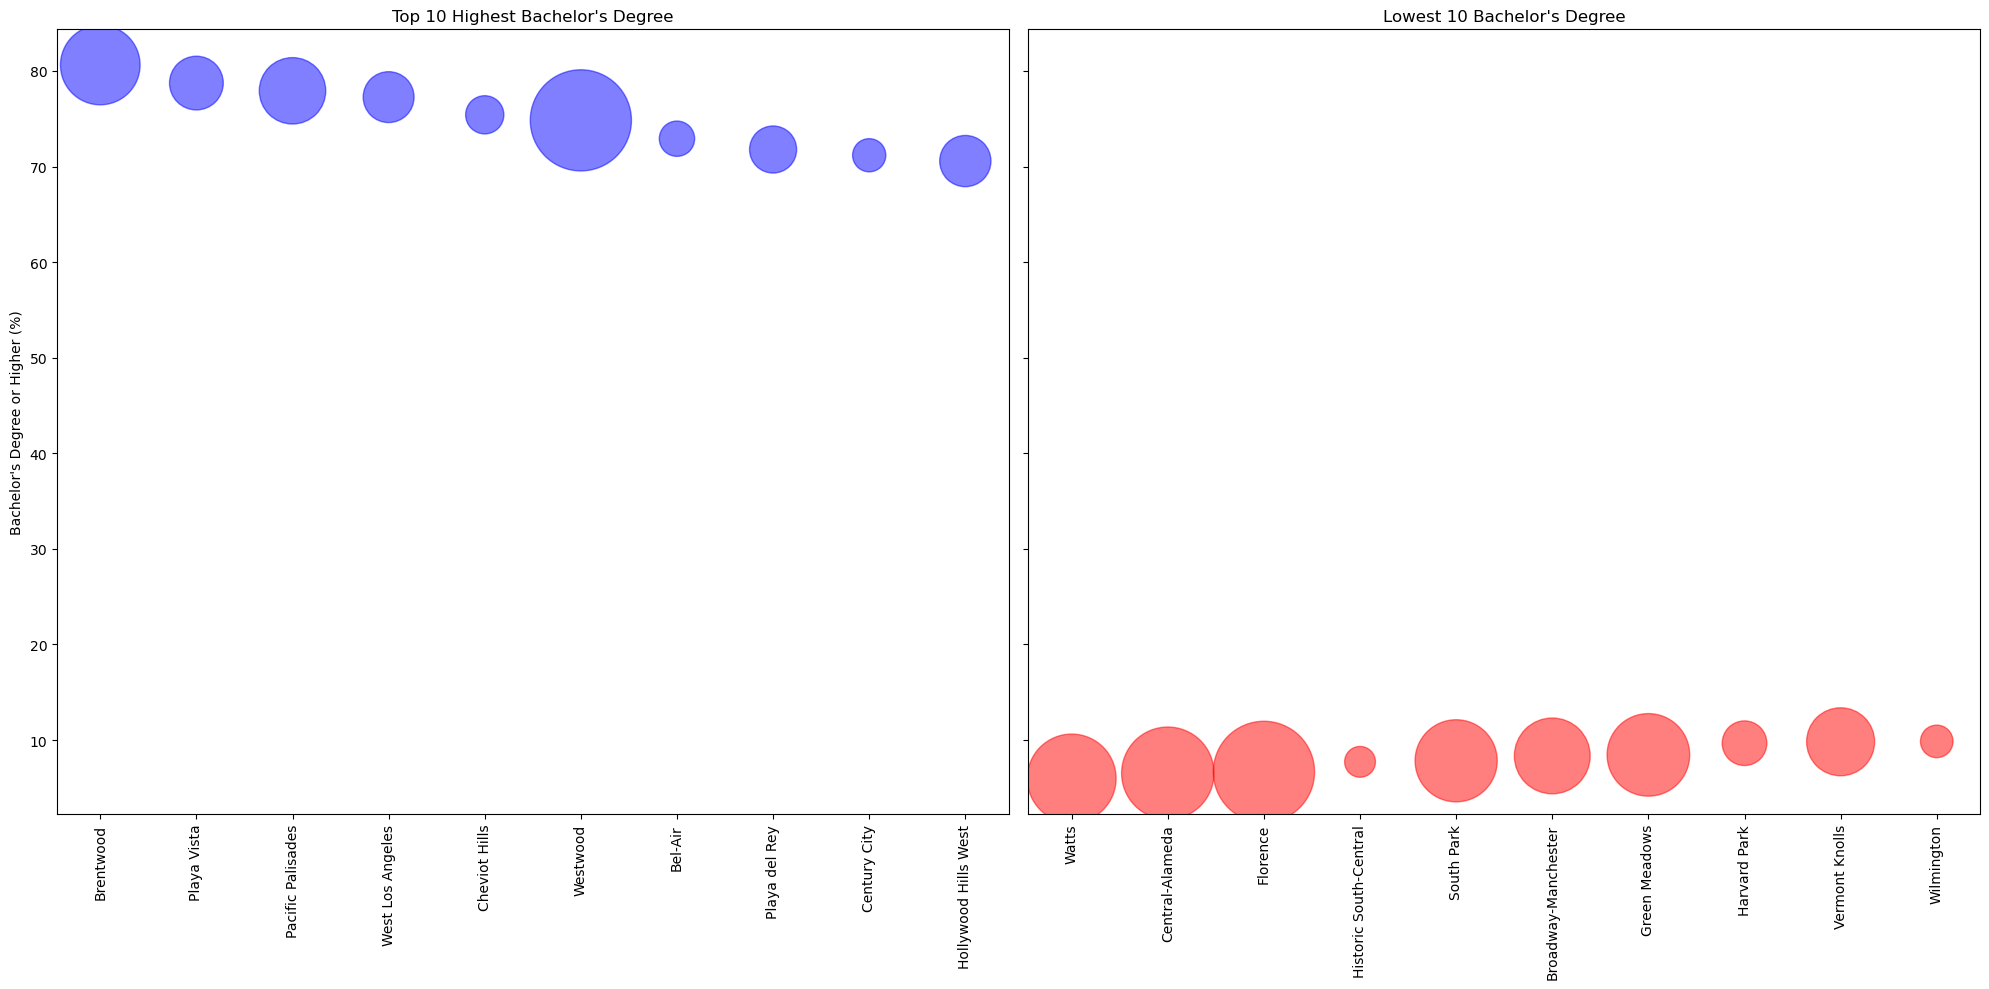

In [587]:
#Create figure and grid of subplots with axes objetcs. Specify size and scale
fig, ax = plt.subplots(1, 2, figsize=(20, 10), sharey=True)

# Top 10 Highest first subplot. Size the points (population size) and set elements of plot
ax[0].scatter(top_10_highest['Neighborhoods'], top_10_highest["Bachelor's Degree or Higher"], 
              s=top_10_highest['size'], alpha=0.5, color='blue')
ax[0].set_title('Top 10 Highest Bachelor\'s Degree')
ax[0].set_xticks(range(len(top_10_highest)))
ax[0].set_xticklabels(top_10_highest['Neighborhoods'], rotation=90)
ax[0].set_ylabel('Bachelor\'s Degree or Higher (%)')

# Specified Lowest 10, containing the sorted list
ax[1].scatter(lowest_10_sorted['Neighborhoods'], lowest_10_sorted["Bachelor's Degree or Higher"], 
              s=lowest_10_sorted['size'], alpha=0.5, color='red')
ax[1].set_title('Lowest 10 Bachelor\'s Degree')
ax[1].set_xticks(range(len(lowest_10_sorted)))
ax[1].set_xticklabels(lowest_10_sorted['Neighborhoods'], rotation=90)

#Adjust subplots and displayment
plt.tight_layout()
plt.show()


#### Create a single-plot visualization

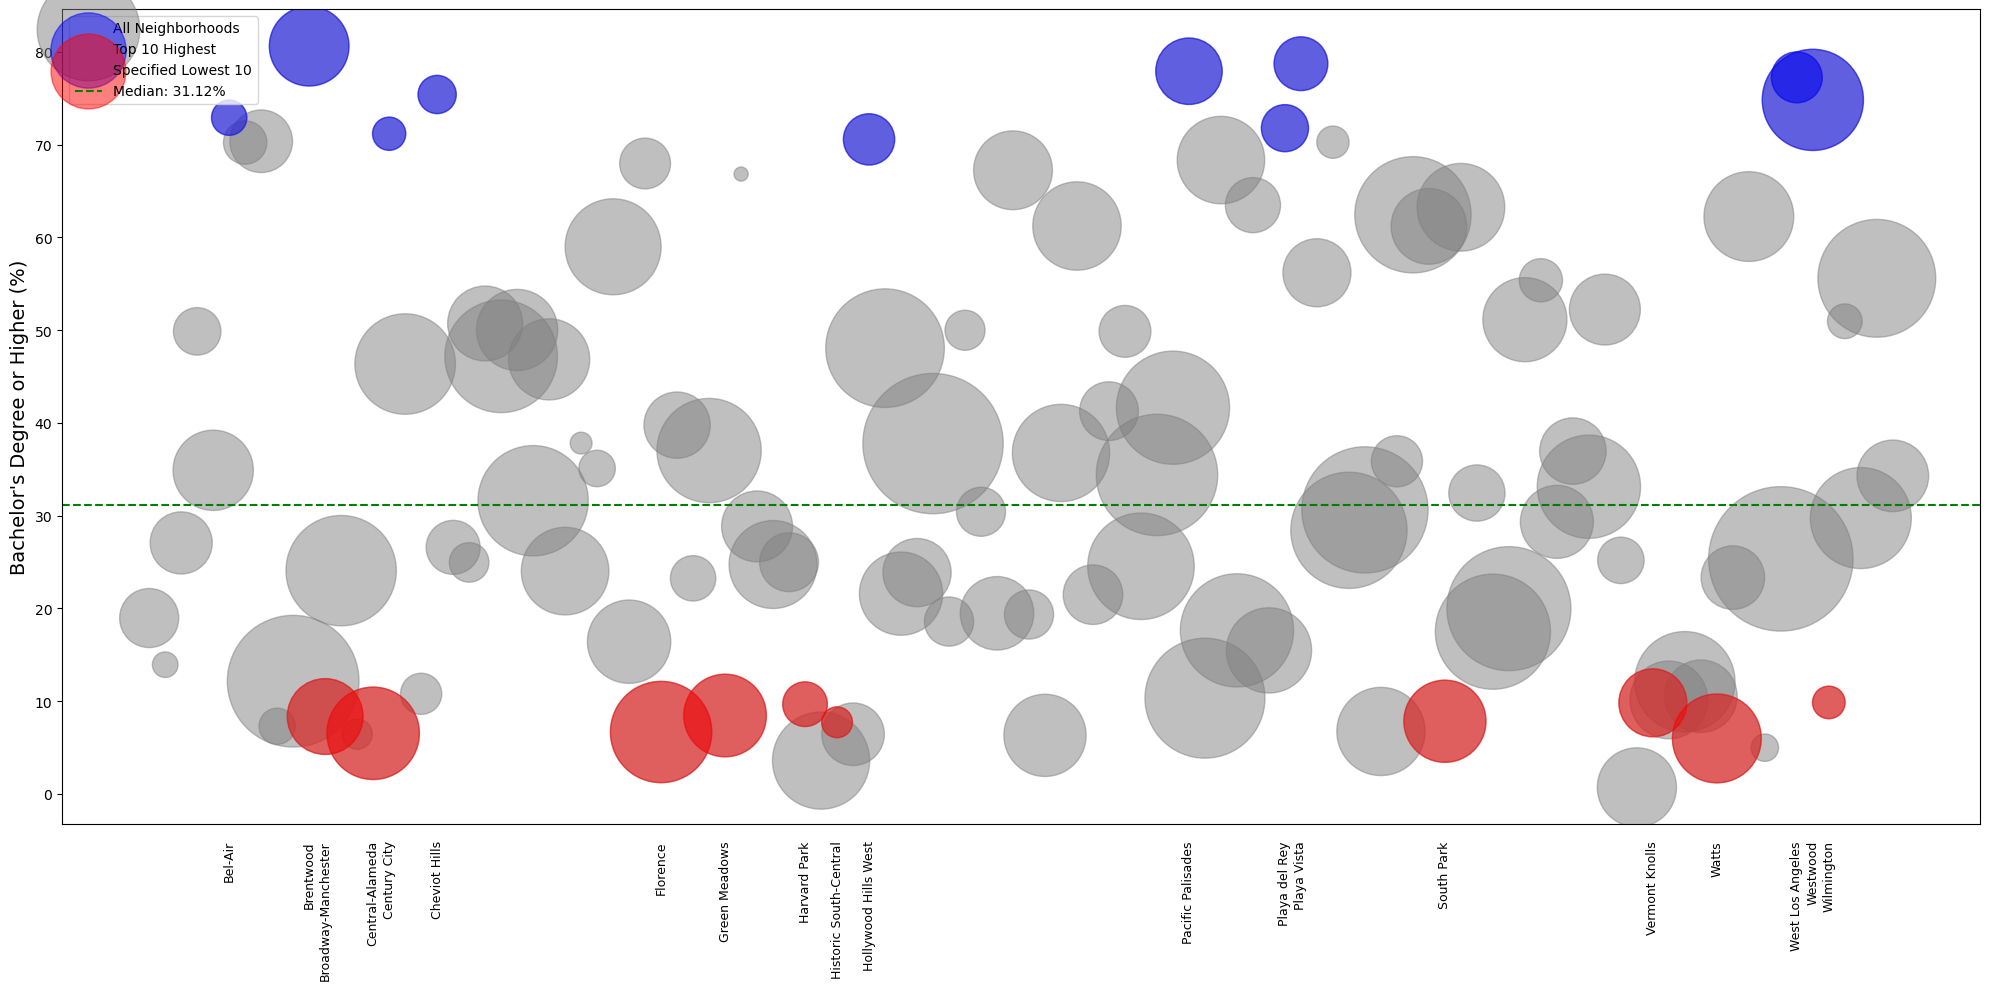

In [588]:
import matplotlib.pyplot as plt
import pandas as pd


# Calculate the median Bachelor's Degree percentage
median_bachelor_degree = merged_gdf["Bachelor's Degree or Higher"].median()

# Combine top 10 and lowest 10 for labeling and drop duplicates
combined_neighborhoods = pd.concat([top_10_highest, lowest_10]).drop_duplicates()

# Create figure object and subplot
fig, ax = plt.subplots(figsize=(20, 10))

# Plot all neighborhoods in a neutral color
ax.scatter(merged_gdf['Neighborhoods'], merged_gdf["Bachelor's Degree or Higher"], 
           s=merged_gdf['size'], color='gray', alpha=0.5, label='All Neighborhoods')

# Overlay top 10 highest neighborhoods
ax.scatter(top_10_highest['Neighborhoods'], top_10_highest["Bachelor's Degree or Higher"], 
           s=top_10_highest['size'], color='blue', label='Top 10 Highest', alpha=0.5)

# Overlay specified lowest 10 neighborhoods
ax.scatter(lowest_10['Neighborhoods'], lowest_10["Bachelor's Degree or Higher"], 
           s=lowest_10['size'], color='red', label='Specified Lowest 10', alpha=0.5)

# Add a line for the median Bachelor's Degree percentage
ax.axhline(y=median_bachelor_degree, color='green', linestyle='--', label=f'Median: {median_bachelor_degree:.2f}%')

# Customize x-axis to only label combined top 10 and lowest 10 neighborhoods. Loop for diplsay of labels
# Clear existing labels
ax.set_xticks([])
# Add labels for the combined neighborhoods and proper adjustment
for neighborhood in combined_neighborhoods['Neighborhoods']:
    ax.text(merged_gdf[merged_gdf['Neighborhoods'] == neighborhood].index[0], 
            -5,  # This value may vary depending on the projected size
            neighborhood, 
            rotation=90, 
            ha='center', 
            va='top',
            fontsize=9)

# Set labels and legend
ax.set_ylabel("Bachelor's Degree or Higher (%)", fontsize=14)
ax.legend()

# Display plot
plt.tight_layout()
plt.show()
